In [45]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [46]:
df = pd.read_csv('./dataset/train.csv')

In [47]:
colum_nans = {}
for column in df:
    colum_nans[ column ] = df[column].isna().sum()

for key , val in colum_nans.items():
    print( f'Column: {key :<15}\t Nans: {val}' )

Column: id             	 Nans: 0
Column: brand          	 Nans: 0
Column: model          	 Nans: 0
Column: model_year     	 Nans: 0
Column: milage         	 Nans: 0
Column: fuel_type      	 Nans: 5083
Column: engine         	 Nans: 0
Column: transmission   	 Nans: 0
Column: ext_col        	 Nans: 0
Column: int_col        	 Nans: 0
Column: accident       	 Nans: 2452
Column: clean_title    	 Nans: 21419
Column: price          	 Nans: 0


In [48]:
df['clean_title'] = df['clean_title'].fillna(value = 'No')
df['accident'] = df['accident'].fillna(value = 'unknown')
df['fuel_type'] = df['fuel_type'].fillna(value = 'Electric')  ## Most of the missing values was infact electric

In [49]:
## How many distinc models we have
distinct_models = df.groupby(['model']).count().to_numpy()

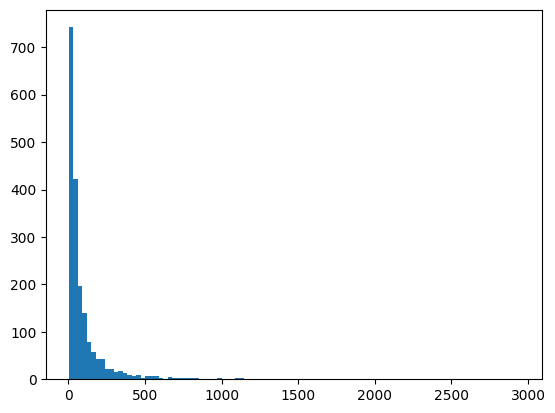

In [50]:
_ = plt.hist(distinct_models.T[0], bins = 100)

In [51]:
df['price'] = df['price'].astype(float)
df['model_year'] = df['model_year'].astype(int)
df['milage'] = df['milage'].astype(int)

In [52]:
df['model_price_avg'] = df.groupby(['model'])['price'].transform('mean')

In [53]:
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,model_price_avg
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,12832.716263
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,12663.379310
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,23779.677419
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,48915.842105
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,64896.257198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500.0,51053.165468
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000.0,56182.990741
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900.0,64430.000000
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900.0,37505.533835


In [54]:
## For now, the engine type is droped
df = df.drop('engine', axis=1)
df = df.drop('model', axis=1)
df = df.drop('id', axis=1)
df = df.drop('int_col', axis=1)
df = df.drop('ext_col', axis=1)

In [55]:
ohc = OneHotEncoder()
stc = StandardScaler()

In [56]:
categoricals = ['brand' , 'fuel_type' , 'transmission' , 'accident' , 'clean_title' ]
numerical = [ 'model_year' , 'milage' , 'model_price_avg' ]

In [57]:
transformer = ColumnTransformer([('categorical', ohc, categoricals),
                                ('numericals', stc, numerical)])

In [58]:
transformer.fit(df[ categoricals + numerical ])

ColumnTransformer(transformers=[('categorical', OneHotEncoder(),
                                 ['brand', 'fuel_type', 'transmission',
                                  'accident', 'clean_title']),
                                ('numericals', StandardScaler(),
                                 ['model_year', 'milage', 'model_price_avg'])])

In [59]:
X_ = transformer.transform(df)

In [60]:
Y_ = df['price'].to_numpy().reshape(-1)

In [61]:
Y_

array([ 4200.,  4999., 13900., ..., 86900., 84900., 28995.])

In [62]:
X_train, X_test , y_train , y_test = train_test_split(X_, Y_ , test_size = 0.2)
for x in X_train[0]:
    print(x)

  (0, 43)	1.0
  (0, 60)	1.0
  (0, 103)	1.0
  (0, 118)	1.0
  (0, 121)	1.0
  (0, 122)	-1.0298617014297777
  (0, 123)	1.2911095073479382
  (0, 124)	0.6931385176831358


In [63]:
sgdr = SGDRegressor(loss = 'squared_error')

In [64]:
X_train.shape

(150826, 125)

In [65]:
sgdr.fit(X_train ,y_train.reshape(-1))

SGDRegressor()

In [66]:
root_mean_squared_error(y_test.reshape(-1) , sgdr.predict(X_test))

77152.59003694347